In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
df = pd.read_csv('heart failure - heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.shape

(299, 13)

In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

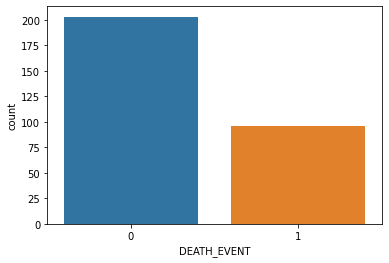

In [7]:
sns.countplot(x= 'DEATH_EVENT', data=df)

<AxesSubplot:>

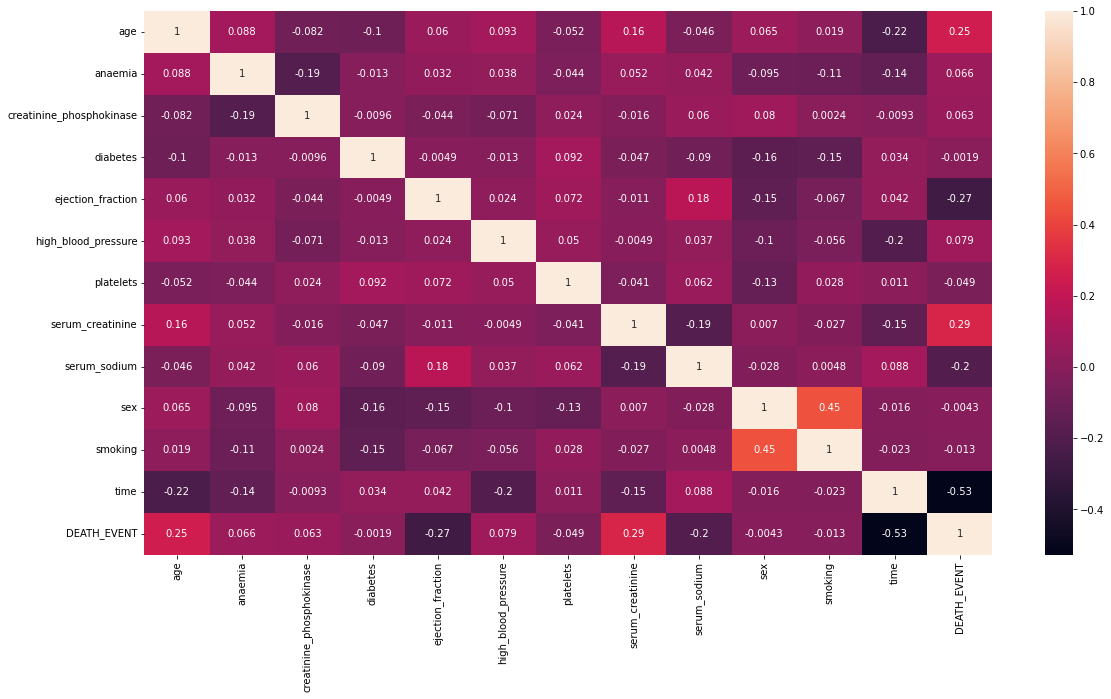

In [8]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

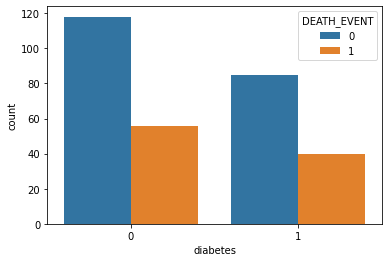

In [9]:
sns.countplot(x= 'diabetes', hue= 'DEATH_EVENT', data=df )

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

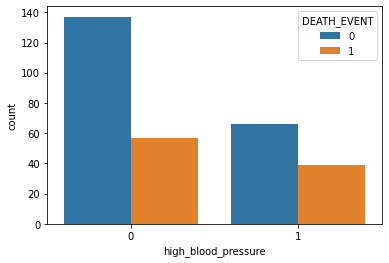

In [10]:
sns.countplot(x='high_blood_pressure', hue= 'DEATH_EVENT', data=df )

In [11]:
x = df.drop('DEATH_EVENT', axis=1)
y= df[['DEATH_EVENT']]

In [12]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= .30, random_state=42)

In [16]:
xtrain.shape

(209, 12)

In [17]:
df.shape

(299, 13)

In [18]:
xtest.shape

(90, 12)

In [19]:
xtrain

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.000,0,582,1,25,0,504000.00,1.0,138,1,0,205
68,70.000,0,161,0,25,0,244000.00,1.2,142,0,0,66
222,42.000,1,86,0,35,0,365000.00,1.1,139,1,1,201
37,82.000,1,855,1,50,1,321000.00,1.0,145,0,0,30
16,87.000,1,149,0,38,0,262000.00,0.9,140,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier()

In [22]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [23]:
clf.score(xtrain, ytrain)

1.0

In [24]:
pred = clf.predict(xtest)

In [25]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [26]:
xtest['pred_y'] = pred

In [27]:
xtest

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,pred_y
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250,1
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129,0
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
15,82.0,1,379,0,50,0,47000.00,1.30,136,1,0,13,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,0


In [28]:
xtest['actual_y'] = ytest

In [29]:
xtest

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,pred_y,actual_y
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250,1,0
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0,0
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129,0,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1,1
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0,0
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1,1
15,82.0,1,379,0,50,0,47000.00,1.30,136,1,0,13,1,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,0,1


In [30]:
xtest.drop(['pred_y', 'actual_y'], axis =1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72
15,82.0,1,379,0,50,0,47000.00,1.30,136,1,0,13
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10


In [31]:
xtest = xtest.drop(['pred_y', 'actual_y'], axis =1)

In [32]:
xtest

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240
164,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72
15,82.0,1,379,0,50,0,47000.00,1.30,136,1,0,13
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10


In [33]:
pred = clf.predict(xtest)

In [34]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [36]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.81      0.77        53\n           1       0.69      0.59      0.64        37\n\n    accuracy                           0.72        90\n   macro avg       0.71      0.70      0.71        90\nweighted avg       0.72      0.72      0.72        90\n'

In [37]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        53
           1       0.69      0.59      0.64        37

    accuracy                           0.72        90
   macro avg       0.71      0.70      0.71        90
weighted avg       0.72      0.72      0.72        90



In [38]:
cm=confusion_matrix(ytest, pred)
cm

array([[43, 10],
       [15, 22]], dtype=int64)

In [39]:
(43+19)/(43+10+18+19)

0.6888888888888889

In [40]:
clf.score(xtest, ytest)

0.7222222222222222

In [41]:
accuracy_score(ytest, pred)

0.7222222222222222

In [42]:
tp, fn, fp, tn = confusion_matrix(ytest, pred). reshape(-1)

In [43]:
tp

43

In [44]:
fp

15

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


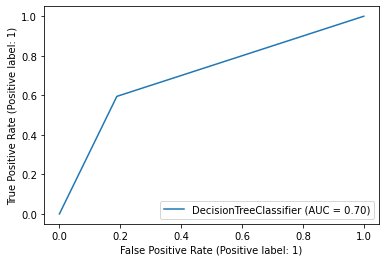

In [45]:
plot_roc_curve(clf, xtest, ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


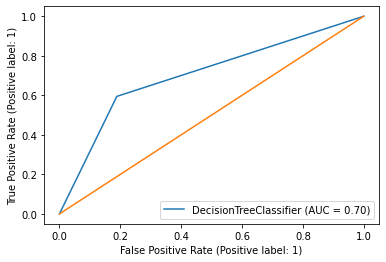

In [46]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1], [0,1])